In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

plt.rcParams['font.size'] = 16

In [11]:
import seaborn as sns

In [2]:
# For plotting
colors = ["#a0e85b", "#104b6d", "#4bd6fd", "#3e8e9d", "#85e8b7", "#0b5313"]

In [57]:
# 17019 yield
m1 = pd.read_csv('../data/future/yields/maize/maize_17019_RCP45_30-50_SR_09_NOTREND.csv')[::100]
m2 = pd.read_csv('../data/future/yields/maize/maize_17019_RCP45_30-50_SM_week_NOTREND.csv')[::100]
m3 = pd.read_csv('../data/future/yields/maize/maize_17019_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

s1 = pd.read_csv('../data/future/yields/soy/soy_17019_RCP45_30-50_SR_09_NOTREND.csv')[::100]
s2 = pd.read_csv('../data/future/yields/soy/soy_17019_RCP45_30-50_SM_week_NOTREND.csv')[::100]
s3 = pd.read_csv('../data/future/yields/soy/soy_17019_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

sg1 = pd.read_csv('../data/future/yields/sorghum/sorghum_17019_RCP45_30-50_SR_09_NOTREND.csv')[::100]
sg2 = pd.read_csv('../data/future/yields/sorghum/sorghum_17019_RCP45_30-50_SM_week_NOTREND.csv')[::100]
sg3 = pd.read_csv('../data/future/yields/sorghum/sorghum_17019_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

sw1 = pd.read_csv('../data/future/yields/springwheat/springwheat_17019_RCP45_30-50_SR_09_NOTREND.csv')[::100]
sw2 = pd.read_csv('../data/future/yields/springwheat/springwheat_17019_RCP45_30-50_SM_week_NOTREND.csv')[::100]
sw3 = pd.read_csv('../data/future/yields/springwheat/springwheat_17019_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

b1 = pd.read_csv('../data/future/yields/barley/barley_17019_RCP45_30-50_SR_09_NOTREND.csv')[::100]
b2 = pd.read_csv('../data/future/yields/barley/barley_17019_RCP45_30-50_SM_week_NOTREND.csv')[::100]
b3 = pd.read_csv('../data/future/yields/barley/barley_17019_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

c1 = pd.read_csv('../data/future/yields/cotton/cotton_17019_RCP45_30-50_SR_09_NOTREND.csv')[::100]
c2 = pd.read_csv('../data/future/yields/cotton/cotton_17019_RCP45_30-50_SM_week_NOTREND.csv')[::100]
c3 = pd.read_csv('../data/future/yields/cotton/cotton_17019_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

In [58]:
# Take 5 year increments for better plot
m1 = m1[m1.year % 5 == 0]
m2 = m2[m2.year % 5 == 0]
m3 = m3[m3.year % 5 == 0]

s1 = s1[s1.year % 5 == 0]
s2 = s2[s2.year % 5 == 0]
s3 = s3[s3.year % 5 == 0]

sg1 = sg1[sg1.year % 5 == 0]
sg2 = sg2[sg2.year % 5 == 0]
sg3 = sg3[sg3.year % 5 == 0]

sw1 = sw1[sw1.year % 5 == 0]
sw2 = sw2[sw2.year % 5 == 0]
sw3 = sw3[sw3.year % 5 == 0]

b1 = b1[b1.year % 5 == 0]
b2 = b2[b2.year % 5 == 0]
b3 = b3[b3.year % 5 == 0]

c1 = c1[c1.year % 5 == 0]
c2 = c2[c2.year % 5 == 0]
c3 = c3[c3.year % 5 == 0]

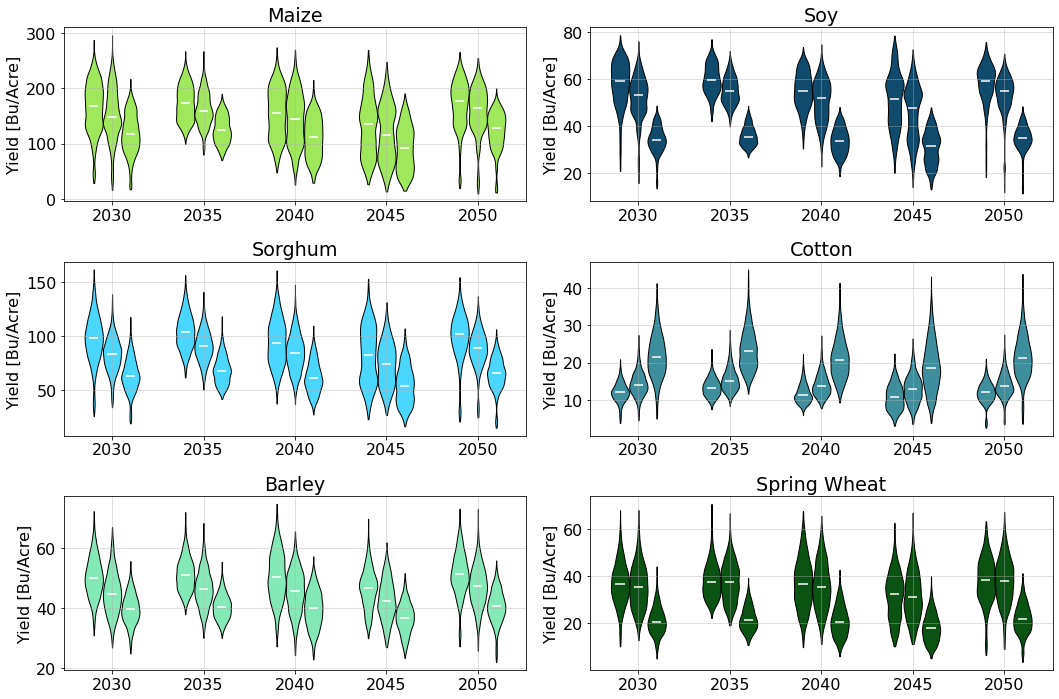

In [59]:
# Plot all
fig, axs = plt.subplots(3,2, figsize=(15,10))

# Params
d=1
s=100
w=1
years = np.array([2030, 2035, 2040, 2045, 2050])

# Maize
ax = axs[0,0]
m1v = ax.violinplot(np.split(np.exp(m1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
m1v['cmedians'].set_color('white')
for pc in m1v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

m2v = ax.violinplot(np.split(np.exp(m2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
m2v['cmedians'].set_color('white')
for pc in m2v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

m3v = ax.violinplot(np.split(np.exp(m3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
m3v['cmedians'].set_color('white')
for pc in m3v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Maize')
ax.set_ylabel('Yield [Bu/Acre]')

# Soy
ax = axs[0,1]
s1v = ax.violinplot(np.split(np.exp(s1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
s1v['cmedians'].set_color('white')
for pc in s1v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

s2v = ax.violinplot(np.split(np.exp(s2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
s2v['cmedians'].set_color('white')
for pc in s2v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

s3v = ax.violinplot(np.split(np.exp(s3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
s3v['cmedians'].set_color('white')
for pc in s3v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Soy')
ax.set_ylabel('Yield [Bu/Acre]')

# Sorghum
ax = axs[1,0]
sg1v = ax.violinplot(np.split(np.exp(sg1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
sg1v['cmedians'].set_color('white')
for pc in sg1v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sg2v = ax.violinplot(np.split(np.exp(sg2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
sg2v['cmedians'].set_color('white')
for pc in sg2v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sg3v = ax.violinplot(np.split(np.exp(sg3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
sg3v['cmedians'].set_color('white')
for pc in sg3v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Sorghum')
ax.set_ylabel('Yield [Bu/Acre]')

# Cotton
ax = axs[1,1]
c1v = ax.violinplot(np.split(np.exp(c1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
c1v['cmedians'].set_color('white')
for pc in c1v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

c2v = ax.violinplot(np.split(np.exp(c2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
c2v['cmedians'].set_color('white')
for pc in c2v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

c3v = ax.violinplot(np.split(np.exp(c3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
c3v['cmedians'].set_color('white')
for pc in c3v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Cotton')
ax.set_ylabel('Yield [Bu/Acre]')

# Barley
ax = axs[2,0]
b1v = ax.violinplot(np.split(np.exp(b1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
b1v['cmedians'].set_color('white')
for pc in b1v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

b2v = ax.violinplot(np.split(np.exp(b2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
b2v['cmedians'].set_color('white')
for pc in b2v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

b3v = ax.violinplot(np.split(np.exp(b3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
b3v['cmedians'].set_color('white')
for pc in b3v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Barley')
ax.set_ylabel('Yield [Bu/Acre]')

# Spring Wheat
ax = axs[2,1]
sw1v = ax.violinplot(np.split(np.exp(sw1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
sw1v['cmedians'].set_color('white')
for pc in sw1v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sw2v = ax.violinplot(np.split(np.exp(sw2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
sw2v['cmedians'].set_color('white')
for pc in sw2v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sw3v = ax.violinplot(np.split(np.exp(sw3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
sw3v['cmedians'].set_color('white')
for pc in sw3v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Spring Wheat')
ax.set_ylabel('Yield [Bu/Acre]')

plt.tight_layout()
plt.savefig('../figs/17091_rcp_yield_notrend.png', dpi=500)
# plt.show()

In [60]:
# 40039 yield
m1 = pd.read_csv('../data/future/yields/maize/maize_40039_RCP45_30-50_SR_09_NOTREND.csv')[::100]
m2 = pd.read_csv('../data/future/yields/maize/maize_40039_RCP45_30-50_SM_week_NOTREND.csv')[::100]
m3 = pd.read_csv('../data/future/yields/maize/maize_40039_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

s1 = pd.read_csv('../data/future/yields/soy/soy_40039_RCP45_30-50_SR_09_NOTREND.csv')[::100]
s2 = pd.read_csv('../data/future/yields/soy/soy_40039_RCP45_30-50_SM_week_NOTREND.csv')[::100]
s3 = pd.read_csv('../data/future/yields/soy/soy_40039_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

sg1 = pd.read_csv('../data/future/yields/sorghum/sorghum_40039_RCP45_30-50_SR_09_NOTREND.csv')[::100]
sg2 = pd.read_csv('../data/future/yields/sorghum/sorghum_40039_RCP45_30-50_SM_week_NOTREND.csv')[::100]
sg3 = pd.read_csv('../data/future/yields/sorghum/sorghum_40039_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

sw1 = pd.read_csv('../data/future/yields/springwheat/springwheat_40039_RCP45_30-50_SR_09_NOTREND.csv')[::100]
sw2 = pd.read_csv('../data/future/yields/springwheat/springwheat_40039_RCP45_30-50_SM_week_NOTREND.csv')[::100]
sw3 = pd.read_csv('../data/future/yields/springwheat/springwheat_40039_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

b1 = pd.read_csv('../data/future/yields/barley/barley_40039_RCP45_30-50_SR_09_NOTREND.csv')[::100]
b2 = pd.read_csv('../data/future/yields/barley/barley_40039_RCP45_30-50_SM_week_NOTREND.csv')[::100]
b3 = pd.read_csv('../data/future/yields/barley/barley_40039_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

c1 = pd.read_csv('../data/future/yields/cotton/cotton_40039_RCP45_30-50_SR_09_NOTREND.csv')[::100]
c2 = pd.read_csv('../data/future/yields/cotton/cotton_40039_RCP45_30-50_SM_week_NOTREND.csv')[::100]
c3 = pd.read_csv('../data/future/yields/cotton/cotton_40039_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

In [61]:
# Take 5 year increments for better plot
m1 = m1[m1.year % 5 == 0]
m2 = m2[m2.year % 5 == 0]
m3 = m3[m3.year % 5 == 0]

s1 = s1[s1.year % 5 == 0]
s2 = s2[s2.year % 5 == 0]
s3 = s3[s3.year % 5 == 0]

sg1 = sg1[sg1.year % 5 == 0]
sg2 = sg2[sg2.year % 5 == 0]
sg3 = sg3[sg3.year % 5 == 0]

sw1 = sw1[sw1.year % 5 == 0]
sw2 = sw2[sw2.year % 5 == 0]
sw3 = sw3[sw3.year % 5 == 0]

b1 = b1[b1.year % 5 == 0]
b2 = b2[b2.year % 5 == 0]
b3 = b3[b3.year % 5 == 0]

c1 = c1[c1.year % 5 == 0]
c2 = c2[c2.year % 5 == 0]
c3 = c3[c3.year % 5 == 0]

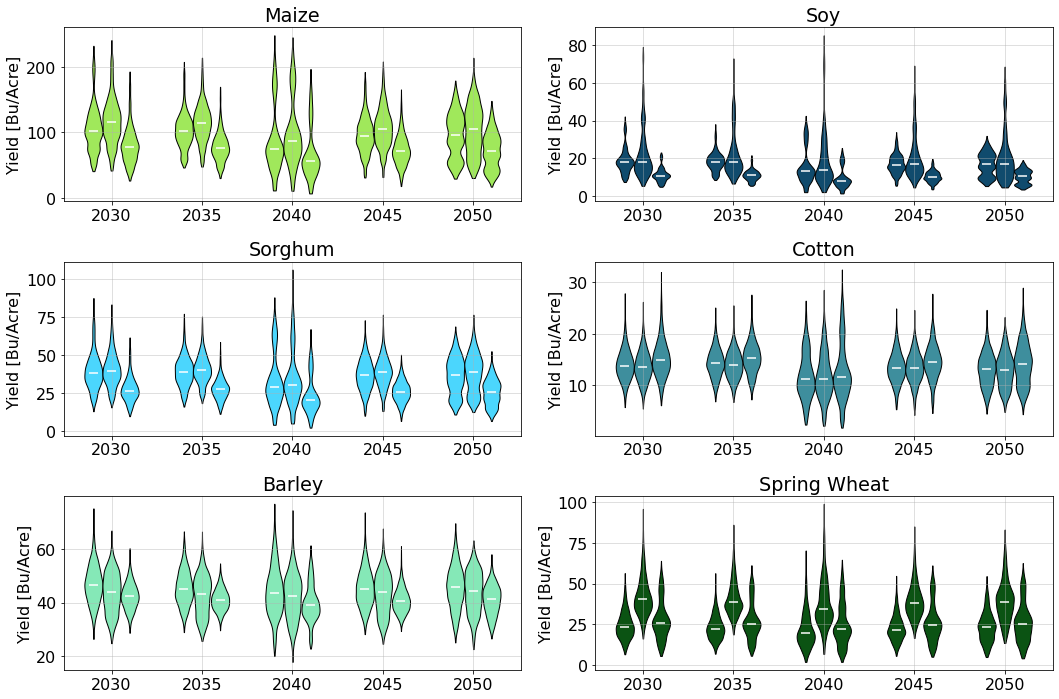

In [62]:
# Plot all
fig, axs = plt.subplots(3,2, figsize=(15,10))

# Params
d=1
s=100
w=1
years = np.array([2030, 2035, 2040, 2045, 2050])

# Maize
ax = axs[0,0]
m1v = ax.violinplot(np.split(np.exp(m1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
m1v['cmedians'].set_color('white')
for pc in m1v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

m2v = ax.violinplot(np.split(np.exp(m2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
m2v['cmedians'].set_color('white')
for pc in m2v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

m3v = ax.violinplot(np.split(np.exp(m3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
m3v['cmedians'].set_color('white')
for pc in m3v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Maize')
ax.set_ylabel('Yield [Bu/Acre]')

# Soy
ax = axs[0,1]
s1v = ax.violinplot(np.split(np.exp(s1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
s1v['cmedians'].set_color('white')
for pc in s1v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

s2v = ax.violinplot(np.split(np.exp(s2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
s2v['cmedians'].set_color('white')
for pc in s2v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

s3v = ax.violinplot(np.split(np.exp(s3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
s3v['cmedians'].set_color('white')
for pc in s3v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Soy')
ax.set_ylabel('Yield [Bu/Acre]')

# Sorghum
ax = axs[1,0]
sg1v = ax.violinplot(np.split(np.exp(sg1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
sg1v['cmedians'].set_color('white')
for pc in sg1v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sg2v = ax.violinplot(np.split(np.exp(sg2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
sg2v['cmedians'].set_color('white')
for pc in sg2v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sg3v = ax.violinplot(np.split(np.exp(sg3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
sg3v['cmedians'].set_color('white')
for pc in sg3v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Sorghum')
ax.set_ylabel('Yield [Bu/Acre]')

# Cotton
ax = axs[1,1]
c1v = ax.violinplot(np.split(np.exp(c1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
c1v['cmedians'].set_color('white')
for pc in c1v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

c2v = ax.violinplot(np.split(np.exp(c2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
c2v['cmedians'].set_color('white')
for pc in c2v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

c3v = ax.violinplot(np.split(np.exp(c3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
c3v['cmedians'].set_color('white')
for pc in c3v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Cotton')
ax.set_ylabel('Yield [Bu/Acre]')

# Barley
ax = axs[2,0]
b1v = ax.violinplot(np.split(np.exp(b1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
b1v['cmedians'].set_color('white')
for pc in b1v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

b2v = ax.violinplot(np.split(np.exp(b2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
b2v['cmedians'].set_color('white')
for pc in b2v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

b3v = ax.violinplot(np.split(np.exp(b3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
b3v['cmedians'].set_color('white')
for pc in b3v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Barley')
ax.set_ylabel('Yield [Bu/Acre]')

# Spring Wheat
ax = axs[2,1]
sw1v = ax.violinplot(np.split(np.exp(sw1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
sw1v['cmedians'].set_color('white')
for pc in sw1v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sw2v = ax.violinplot(np.split(np.exp(sw2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
sw2v['cmedians'].set_color('white')
for pc in sw2v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sw3v = ax.violinplot(np.split(np.exp(sw3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
sw3v['cmedians'].set_color('white')
for pc in sw3v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Spring Wheat')
ax.set_ylabel('Yield [Bu/Acre]')

plt.tight_layout()
plt.savefig('../figs/40039_rcp_yield_notrend.png', dpi=500)
# plt.show()

In [63]:
# 38071 yield
m1 = pd.read_csv('../data/future/yields/maize/maize_38071_RCP45_30-50_SR_09_NOTREND.csv')[::100]
m2 = pd.read_csv('../data/future/yields/maize/maize_38071_RCP45_30-50_SM_week_NOTREND.csv')[::100]
m3 = pd.read_csv('../data/future/yields/maize/maize_38071_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

s1 = pd.read_csv('../data/future/yields/soy/soy_38071_RCP45_30-50_SR_09_NOTREND.csv')[::100]
s2 = pd.read_csv('../data/future/yields/soy/soy_38071_RCP45_30-50_SM_week_NOTREND.csv')[::100]
s3 = pd.read_csv('../data/future/yields/soy/soy_38071_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

sg1 = pd.read_csv('../data/future/yields/sorghum/sorghum_38071_RCP45_30-50_SR_09_NOTREND.csv')[::100]
sg2 = pd.read_csv('../data/future/yields/sorghum/sorghum_38071_RCP45_30-50_SM_week_NOTREND.csv')[::100]
sg3 = pd.read_csv('../data/future/yields/sorghum/sorghum_38071_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

sw1 = pd.read_csv('../data/future/yields/springwheat/springwheat_38071_RCP45_30-50_SR_09_NOTREND.csv')[::100]
sw2 = pd.read_csv('../data/future/yields/springwheat/springwheat_38071_RCP45_30-50_SM_week_NOTREND.csv')[::100]
sw3 = pd.read_csv('../data/future/yields/springwheat/springwheat_38071_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

b1 = pd.read_csv('../data/future/yields/barley/barley_38071_RCP45_30-50_SR_09_NOTREND.csv')[::100]
b2 = pd.read_csv('../data/future/yields/barley/barley_38071_RCP45_30-50_SM_week_NOTREND.csv')[::100]
b3 = pd.read_csv('../data/future/yields/barley/barley_38071_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

c1 = pd.read_csv('../data/future/yields/cotton/cotton_38071_RCP45_30-50_SR_09_NOTREND.csv')[::100]
c2 = pd.read_csv('../data/future/yields/cotton/cotton_38071_RCP45_30-50_SM_week_NOTREND.csv')[::100]
c3 = pd.read_csv('../data/future/yields/cotton/cotton_38071_RCP45_30-50_SM_ave_NOTREND.csv')[::100]

In [64]:
# Take 5 year increments for better plot
m1 = m1[m1.year % 5 == 0]
m2 = m2[m2.year % 5 == 0]
m3 = m3[m3.year % 5 == 0]

s1 = s1[s1.year % 5 == 0]
s2 = s2[s2.year % 5 == 0]
s3 = s3[s3.year % 5 == 0]

sg1 = sg1[sg1.year % 5 == 0]
sg2 = sg2[sg2.year % 5 == 0]
sg3 = sg3[sg3.year % 5 == 0]

sw1 = sw1[sw1.year % 5 == 0]
sw2 = sw2[sw2.year % 5 == 0]
sw3 = sw3[sw3.year % 5 == 0]

b1 = b1[b1.year % 5 == 0]
b2 = b2[b2.year % 5 == 0]
b3 = b3[b3.year % 5 == 0]

c1 = c1[c1.year % 5 == 0]
c2 = c2[c2.year % 5 == 0]
c3 = c3[c3.year % 5 == 0]

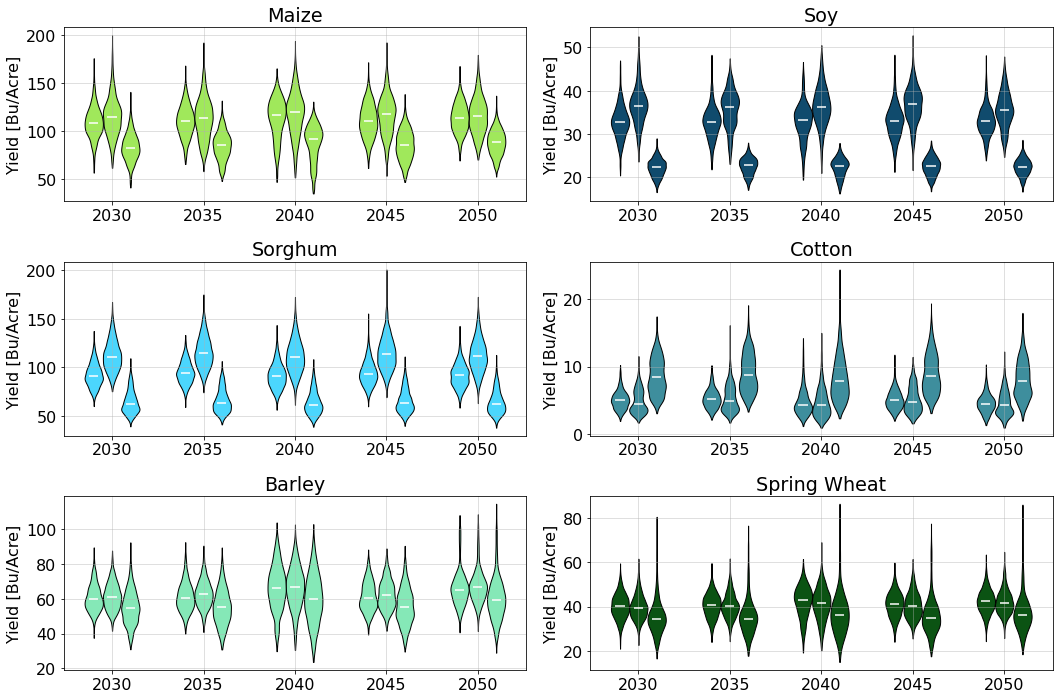

In [65]:
# Plot all
fig, axs = plt.subplots(3,2, figsize=(15,10))

# Params
d=1
s=100
w=1
years = np.array([2030, 2035, 2040, 2045, 2050])

# Maize
ax = axs[0,0]
m1v = ax.violinplot(np.split(np.exp(m1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
m1v['cmedians'].set_color('white')
for pc in m1v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

m2v = ax.violinplot(np.split(np.exp(m2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
m2v['cmedians'].set_color('white')
for pc in m2v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

m3v = ax.violinplot(np.split(np.exp(m3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
m3v['cmedians'].set_color('white')
for pc in m3v['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Maize')
ax.set_ylabel('Yield [Bu/Acre]')

# Soy
ax = axs[0,1]
s1v = ax.violinplot(np.split(np.exp(s1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
s1v['cmedians'].set_color('white')
for pc in s1v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

s2v = ax.violinplot(np.split(np.exp(s2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
s2v['cmedians'].set_color('white')
for pc in s2v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

s3v = ax.violinplot(np.split(np.exp(s3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
s3v['cmedians'].set_color('white')
for pc in s3v['bodies']:
    pc.set_facecolor(colors[1])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Soy')
ax.set_ylabel('Yield [Bu/Acre]')

# Sorghum
ax = axs[1,0]
sg1v = ax.violinplot(np.split(np.exp(sg1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
sg1v['cmedians'].set_color('white')
for pc in sg1v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sg2v = ax.violinplot(np.split(np.exp(sg2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
sg2v['cmedians'].set_color('white')
for pc in sg2v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sg3v = ax.violinplot(np.split(np.exp(sg3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
sg3v['cmedians'].set_color('white')
for pc in sg3v['bodies']:
    pc.set_facecolor(colors[2])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Sorghum')
ax.set_ylabel('Yield [Bu/Acre]')

# Cotton
ax = axs[1,1]
c1v = ax.violinplot(np.split(np.exp(c1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
c1v['cmedians'].set_color('white')
for pc in c1v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

c2v = ax.violinplot(np.split(np.exp(c2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
c2v['cmedians'].set_color('white')
for pc in c2v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

c3v = ax.violinplot(np.split(np.exp(c3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
c3v['cmedians'].set_color('white')
for pc in c3v['bodies']:
    pc.set_facecolor(colors[3])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Cotton')
ax.set_ylabel('Yield [Bu/Acre]')

# Barley
ax = axs[2,0]
b1v = ax.violinplot(np.split(np.exp(b1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
b1v['cmedians'].set_color('white')
for pc in b1v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

b2v = ax.violinplot(np.split(np.exp(b2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
b2v['cmedians'].set_color('white')
for pc in b2v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

b3v = ax.violinplot(np.split(np.exp(b3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
b3v['cmedians'].set_color('white')
for pc in b3v['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Barley')
ax.set_ylabel('Yield [Bu/Acre]')

# Spring Wheat
ax = axs[2,1]
sw1v = ax.violinplot(np.split(np.exp(sw1['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years+d, showextrema=False, showmedians=True, widths=w)
sw1v['cmedians'].set_color('white')
for pc in sw1v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sw2v = ax.violinplot(np.split(np.exp(sw2['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years-d, showextrema=False, showmedians=True, widths=w)
sw2v['cmedians'].set_color('white')
for pc in sw2v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

sw3v = ax.violinplot(np.split(np.exp(sw3['log_yield_sim']).to_numpy(), np.arange(3000, 15000, 3000)), years, showextrema=False, showmedians=True, widths=w)
sw3v['cmedians'].set_color('white')
for pc in sw3v['bodies']:
    pc.set_facecolor(colors[5])
    pc.set_alpha(1)
    pc.set_edgecolor('black')

ax.set_xticks(np.arange(2030,2051,5))
ax.grid(alpha=0.5)
ax.set_title('Spring Wheat')
ax.set_ylabel('Yield [Bu/Acre]')

plt.tight_layout()
plt.savefig('../figs/38071_rcp_yield_notrend.png', dpi=500)
# plt.show()